# Linear Regression

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable

sns.set_style('whitegrid')

In [54]:
n_values = 256
# Parameters of linear model
slope = 3
intercept = 2
x = np.random.uniform(0, 1, n_values)

# To add noise to the model
noise = np.random.randn(n_values)/3

# Final y data
y = slope * x + intercept + noise

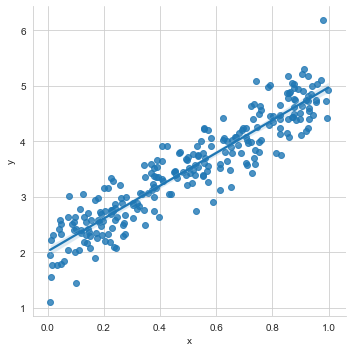

In [55]:
df = pd.DataFrame({'x':x, 'y':y})
sns.lmplot('x', 'y', df)

## Test using Torch model

In [56]:
# Shaping input data
x_train = torch.from_numpy(x).view(-1,1).float()
y_train = torch.from_numpy(y).view(-1,1).float()

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

In [57]:
# Defining learning rate
learning_rate = .1

In [58]:
class LinearRegressionModel(nn.Module):
    '''Linear regression model to test PyTorch'''
    def __init__(self, input_dim, output_dim):
        '''Constuctor of our LinearRegressionModel'''
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [59]:
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()
loss_history = []

In [60]:
# Training
for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    print('epoch : {:3d}, loss : {:1.3f}'.format(epoch, loss.item()))  
    model.zero_grad()
    loss.backward()
    loss_history.append(loss.item())
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

epoch :   0, loss : 9.848
epoch :   1, loss : 5.568
epoch :   2, loss : 3.183
epoch :   3, loss : 1.854
epoch :   4, loss : 1.114
epoch :   5, loss : 0.700
epoch :   6, loss : 0.470
epoch :   7, loss : 0.340
epoch :   8, loss : 0.268
epoch :   9, loss : 0.227
epoch :  10, loss : 0.203
epoch :  11, loss : 0.190
epoch :  12, loss : 0.182
epoch :  13, loss : 0.176
epoch :  14, loss : 0.173
epoch :  15, loss : 0.171
epoch :  16, loss : 0.169
epoch :  17, loss : 0.167
epoch :  18, loss : 0.166
epoch :  19, loss : 0.165
epoch :  20, loss : 0.164
epoch :  21, loss : 0.163
epoch :  22, loss : 0.161
epoch :  23, loss : 0.160
epoch :  24, loss : 0.160
epoch :  25, loss : 0.159
epoch :  26, loss : 0.158
epoch :  27, loss : 0.157
epoch :  28, loss : 0.156
epoch :  29, loss : 0.155
epoch :  30, loss : 0.154
epoch :  31, loss : 0.153
epoch :  32, loss : 0.153
epoch :  33, loss : 0.152
epoch :  34, loss : 0.151
epoch :  35, loss : 0.150
epoch :  36, loss : 0.150
epoch :  37, loss : 0.149
epoch :  38,

epoch : 342, loss : 0.123
epoch : 343, loss : 0.123
epoch : 344, loss : 0.123
epoch : 345, loss : 0.123
epoch : 346, loss : 0.123
epoch : 347, loss : 0.123
epoch : 348, loss : 0.123
epoch : 349, loss : 0.123
epoch : 350, loss : 0.123
epoch : 351, loss : 0.123
epoch : 352, loss : 0.123
epoch : 353, loss : 0.123
epoch : 354, loss : 0.123
epoch : 355, loss : 0.123
epoch : 356, loss : 0.123
epoch : 357, loss : 0.123
epoch : 358, loss : 0.123
epoch : 359, loss : 0.123
epoch : 360, loss : 0.123
epoch : 361, loss : 0.123
epoch : 362, loss : 0.123
epoch : 363, loss : 0.123
epoch : 364, loss : 0.123
epoch : 365, loss : 0.123
epoch : 366, loss : 0.123
epoch : 367, loss : 0.123
epoch : 368, loss : 0.123
epoch : 369, loss : 0.123
epoch : 370, loss : 0.123
epoch : 371, loss : 0.123
epoch : 372, loss : 0.123
epoch : 373, loss : 0.123
epoch : 374, loss : 0.123
epoch : 375, loss : 0.123
epoch : 376, loss : 0.123
epoch : 377, loss : 0.123
epoch : 378, loss : 0.123
epoch : 379, loss : 0.123
epoch : 380,

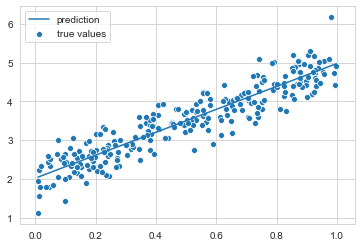

In [61]:
sns.scatterplot(x, y, label='true values')
sns.lineplot(x, y_pred.detach().numpy().reshape(-1,), label='prediction')
plt.legend()
plt.show()

In [62]:
[w, b] = model.parameters()
print('True slope : {}, predicted : {:1.3f}'.format(slope, w.item()))
print('True intercept : {}, predicted : {:1.3f}'.format(intercept, b.item()))

True slope : 3, predicted : 2.956
True intercept : 2, predicted : 2.020


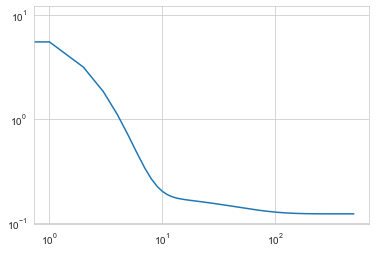

In [63]:
plt.plot(loss_history)
plt.xscale('log')
plt.yscale('log')